<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Regression/Customer_Lifetime_Value_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required libraries

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Data Creation

In [13]:
# For illustration, let's create a synthetic dataset
np.random.seed(0)
data = pd.DataFrame({
    'TotalPurchase': np.random.normal(1000, 200, 1000),
    'NumOfPurchases': np.random.randint(1, 10, 1000),
    'AvgPurchase': np.random.normal(100, 20, 1000),
    'NumOfComplaints': np.random.randint(0, 5, 1000),
    'ProductUsage': np.random.randint(1, 10, 1000),
})

Preprocessing

In [14]:
# Assume a simple linear relationship for CLTV
data['CLTV'] = 1000 + 3*data['TotalPurchase'] - 2*data['NumOfComplaints'] + np.random.normal(0, 100, 1000)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('CLTV', axis=1), data['CLTV'], test_size=0.2, random_state=42)

Model Creation

In [15]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
predictions = model.predict(X_test)

# Print the mean squared error of the model
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")


Mean Squared Error: 10557.2149818945


In [16]:
# Import libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows of the dataset
print(data.head())

# Display dataset information (like count, mean, min, max, etc)
print(data.describe())

# Display dataset information including data types
print(data.info())

   TotalPurchase  NumOfPurchases  AvgPurchase  NumOfComplaints  ProductUsage  \
0    1352.810469               1   109.597273                1             3   
1    1080.031442               7   116.796396                1             2   
2    1195.747597               4   109.709425                2             4   
3    1448.178640               7    55.511704                4             3   
4    1373.511598               6   135.707803                3             6   

          CLTV  
0  5133.270984  
1  4004.501086  
2  4751.601764  
3  5390.530202  
4  5146.416108  
       TotalPurchase  NumOfPurchases  AvgPurchase  NumOfComplaints  \
count    1000.000000     1000.000000  1000.000000      1000.000000   
mean      990.948659        5.044000   100.027745         1.959000   
std       197.505409        2.557069    19.740587         1.426658   
min       390.771389        1.000000    31.188513         0.000000   
25%       860.315988        3.000000    86.323046         1.000000 

<Axes: >

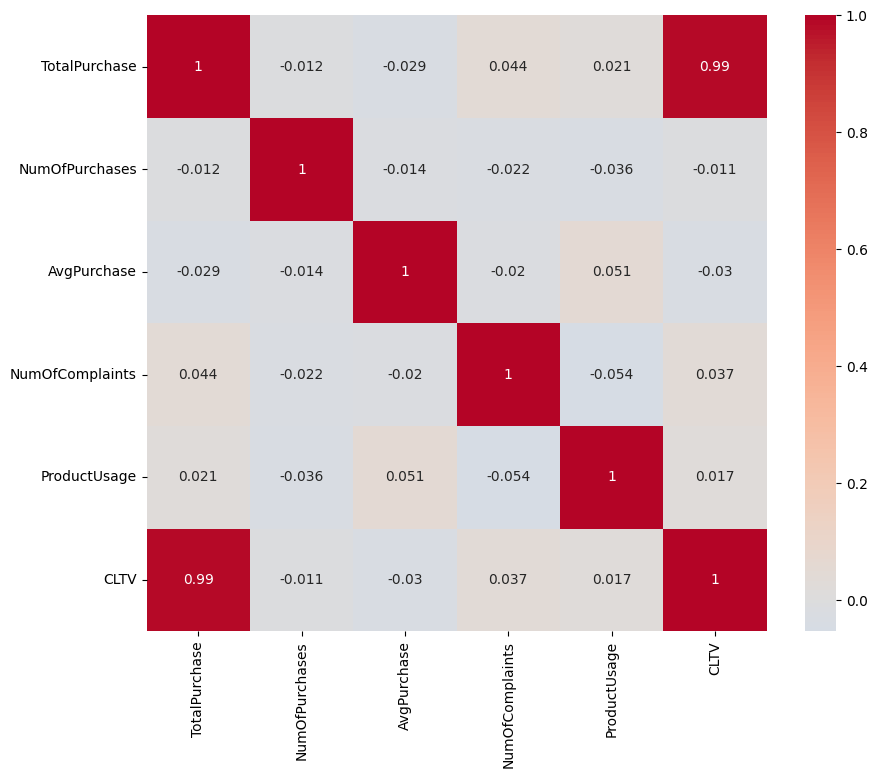

In [17]:
# Plot a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)

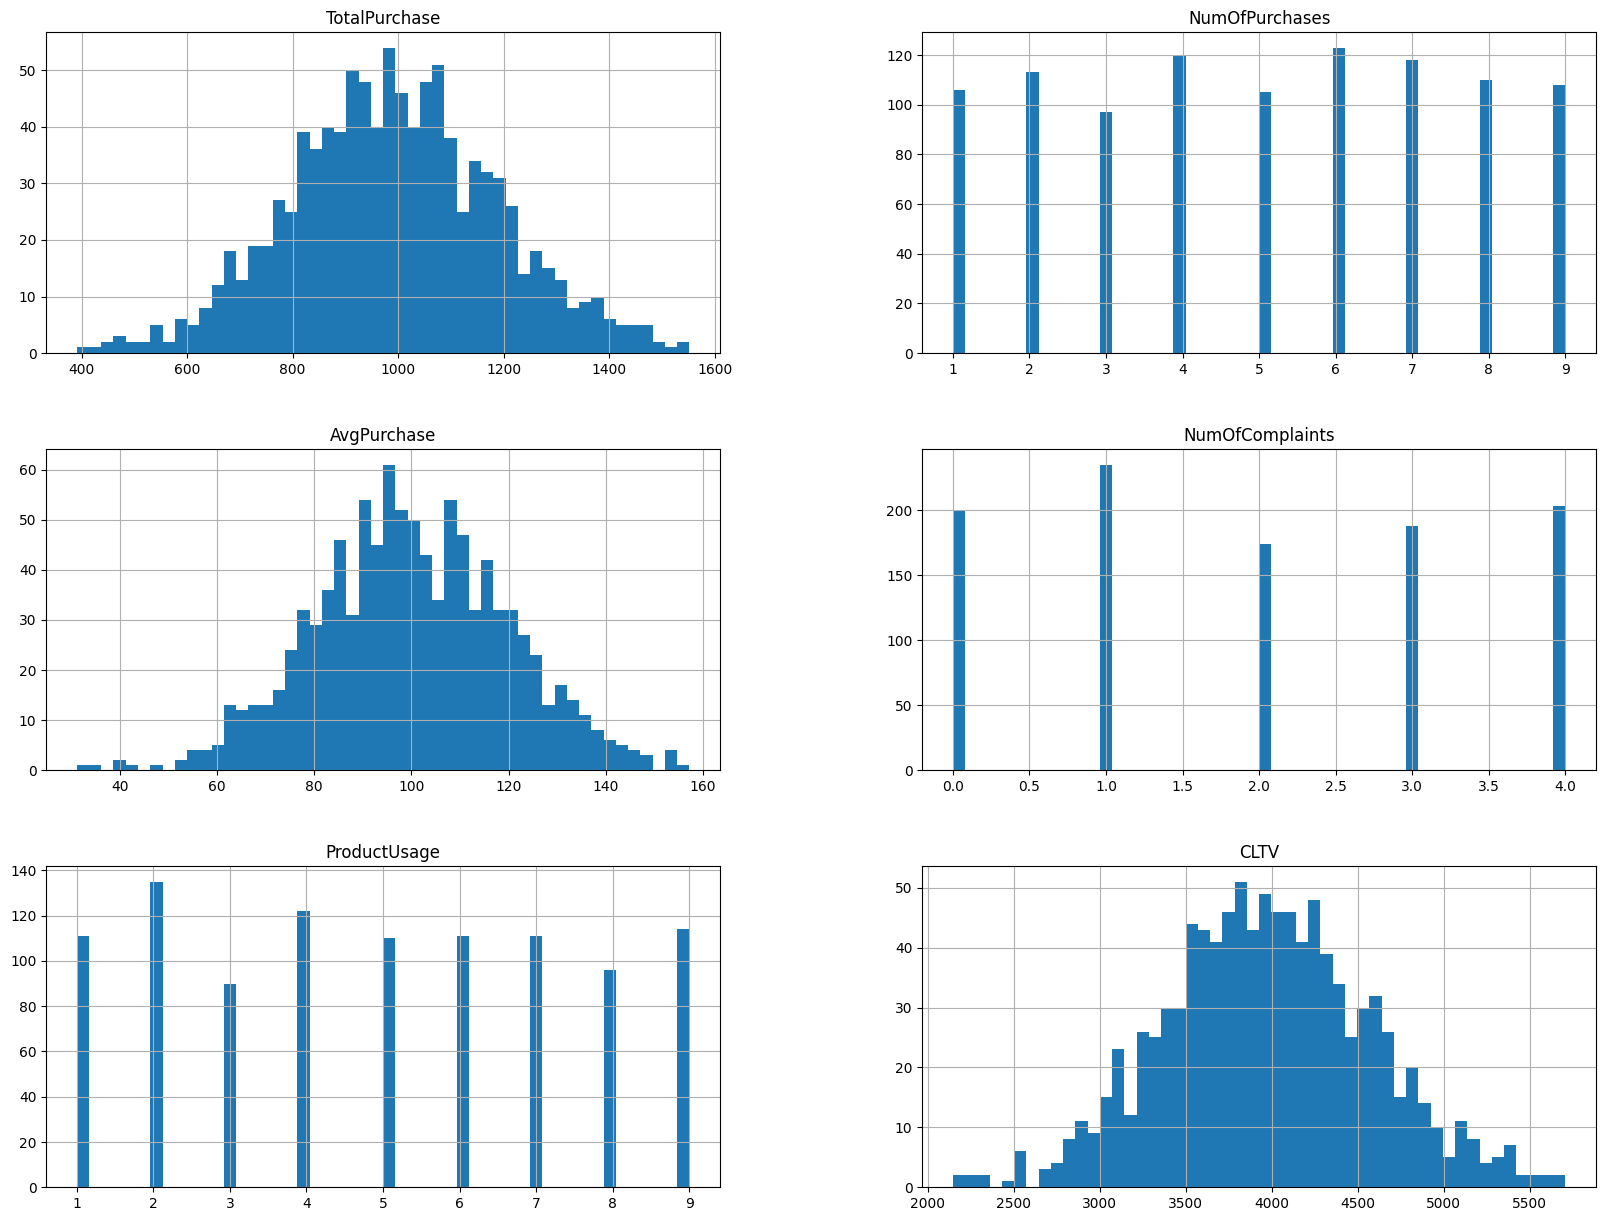

In [18]:
# Visualize the distributions of each feature
data.hist(bins=50, figsize=(20,15))
plt.show()

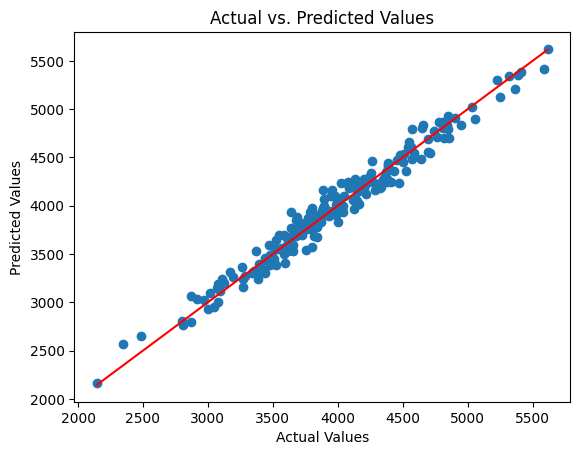

In [19]:
# Visualize the actual values versus the predicted values
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Plot a line for perfect correlation. The closer the points are to this line, the better the prediction.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()